## **ASSIGNMENT-1**

**Importing Libraries**

In [ ]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
import warnings
import yfinance as yf

# Suppress warnings
warnings.filterwarnings("ignore")

**Importing Options Data**

In [ ]:
symbol = "^SPX"
dfo = yf.Ticker(symbol)

# Get current price using historical data (more reliable than info)
current_price = dfo.history(period='1d')['Close'].iloc[-1]

# Select the next recent expiration date
expiration_date = dfo.options[1]
option_chain = dfo.option_chain(expiration_date)

# Extract Calls and Puts Data
calls = option_chain.calls
puts = option_chain.puts

**Call Option Data**

In [ ]:
calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW241212C03000000,2024-11-18 19:24:46+00:00,3000.0,2894.10,3034.8,3050.90,0.0,0.0,NaN,1,4.410649,True,REGULAR,USD
1,SPXW241212C03200000,2024-11-18 19:24:19+00:00,3200.0,2694.83,2834.8,2850.90,0.0,0.0,NaN,2,4.039800,True,REGULAR,USD
2,SPXW241212C04300000,2024-12-10 14:40:32+00:00,4300.0,1754.59,1734.9,1751.30,0.0,0.0,1.0,2,2.331181,True,REGULAR,USD
3,SPXW241212C04900000,2024-11-05 20:11:57+00:00,4900.0,902.00,1183.2,1196.70,0.0,0.0,1.0,0,2.373387,True,REGULAR,USD
4,SPXW241212C05000000,2024-11-20 16:19:58+00:00,5000.0,894.28,1035.1,1051.20,0.0,0.0,4.0,1,1.413455,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,SPXW241212C06600000,2024-12-06 14:30:50+00:00,6600.0,0.05,0.0,0.05,0.0,0.0,4.0,16,0.390631,False,REGULAR,USD
125,SPXW241212C06700000,2024-12-06 19:15:14+00:00,6700.0,0.05,0.0,0.05,0.0,0.0,400.0,501,0.451177,False,REGULAR,USD
126,SPXW241212C06800000,2024-12-02 09:44:11+00:00,6800.0,0.05,0.0,0.05,0.0,0.0,NaN,1,0.508794,False,REGULAR,USD
127,SPXW241212C07000000,2024-11-26 20:45:58+00:00,7000.0,0.05,0.0,0.05,0.0,0.0,1.0,3,0.589848,False,REGULAR,USD


**Put Option Data**

In [ ]:
puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW241212P02400000,2024-11-21 20:34:11+00:00,2400.0,0.05,0.0,0.05,0.0,0.0,22.0,53,3.375002,False,REGULAR,USD
1,SPXW241212P02600000,2024-11-15 17:11:28+00:00,2600.0,0.10,0.0,0.05,0.0,0.0,1.0,61,3.093752,False,REGULAR,USD
2,SPXW241212P02800000,2024-11-20 15:07:05+00:00,2800.0,0.17,0.0,0.05,0.0,0.0,2.0,205,2.828128,False,REGULAR,USD
3,SPXW241212P03000000,2024-11-27 15:21:31+00:00,3000.0,0.05,0.0,0.05,0.0,0.0,1.0,245,2.578129,False,REGULAR,USD
4,SPXW241212P03200000,2024-11-29 17:38:58+00:00,3200.0,0.05,0.0,0.05,0.0,0.0,5.0,340,2.351567,False,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,SPXW241212P06250000,2024-12-03 15:02:55+00:00,6250.0,204.40,203.6,211.90,0.0,0.0,NaN,1,0.000010,True,REGULAR,USD
144,SPXW241212P06275000,2024-12-03 15:02:55+00:00,6275.0,217.95,227.4,235.70,0.0,0.0,NaN,1,0.000010,True,REGULAR,USD
145,SPXW241212P06350000,2024-12-10 20:36:03+00:00,6350.0,312.98,302.8,311.70,0.0,0.0,1.0,11,0.000010,True,REGULAR,USD
146,SPXW241212P06500000,2024-12-09 19:02:07+00:00,6500.0,431.50,452.8,461.10,0.0,0.0,5.0,60,0.000010,True,REGULAR,USD


## **Payoff Calculation**

 **Call option**

payoff=max(-C, S - X - C)


 **Put option**

payoff=max(-P, X - S - P)


where,

P and C are premiums of calls and puts

S is the stock price

X is the strike price

In [ ]:
def payoff(option_type, premium, S, X):
    """
    Calculate the payoff for an option position

    Parameters:
    option_type (str): 'C' for Call, 'P' for Put
    premium (float): Option premium
    S (array): Array of possible stock prices
    X (float): Strike price
    """

    if option_type == 'C':  # Call Option
        return np.maximum(-premium,S-X-premium)
    elif option_type == 'P':  # Put Option
        return np.maximum(-premium,X-S-premium)
    else:
        print("Option type not supported")



**Checking the output of payoff function**

In [ ]:
payoff('C', 10, 120,100)  #answer displayed should be 10

10

In [ ]:
payoff('Z', 10, 120, 100)  #answer displayed should be option type not supported

Option type not supported


In [ ]:
payoff('P', 10, 120, 100)  #answer displayed should be -10

-10

**Plot for Call Option**

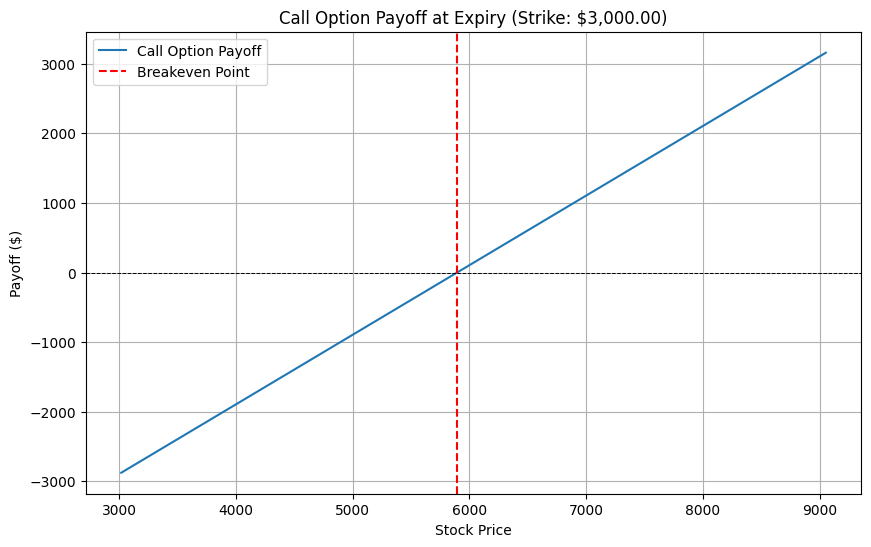

In [ ]:
# Call Option Plot
X_call = calls['strike'].iloc[0]  # Using first strike price
premium_call = calls['lastPrice'].iloc[0]

# Create stock price range based on current price
price_range = 0.5  # 50% above and below current price
StockPrice = np.linspace(current_price * (1 - price_range),
                        current_price * (1 + price_range),
                        1000)

# Calculate payoff (vectorized)
Payoff_Call = payoff('C', premium_call, StockPrice, X_call)

# Plot the call option payoff
plt.figure(figsize=(10, 6))
plt.plot(StockPrice, Payoff_Call, label='Call Option Payoff')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.7)
plt.axvline(x=X_call + premium_call, color='red', linestyle='--', label='Breakeven Point')
plt.xlabel('Stock Price')
plt.ylabel('Payoff ($)')
plt.title(f'Call Option Payoff at Expiry (Strike: ${X_call:,.2f})')
plt.legend()
plt.grid(True)
plt.show()

**Plot for Put Option**

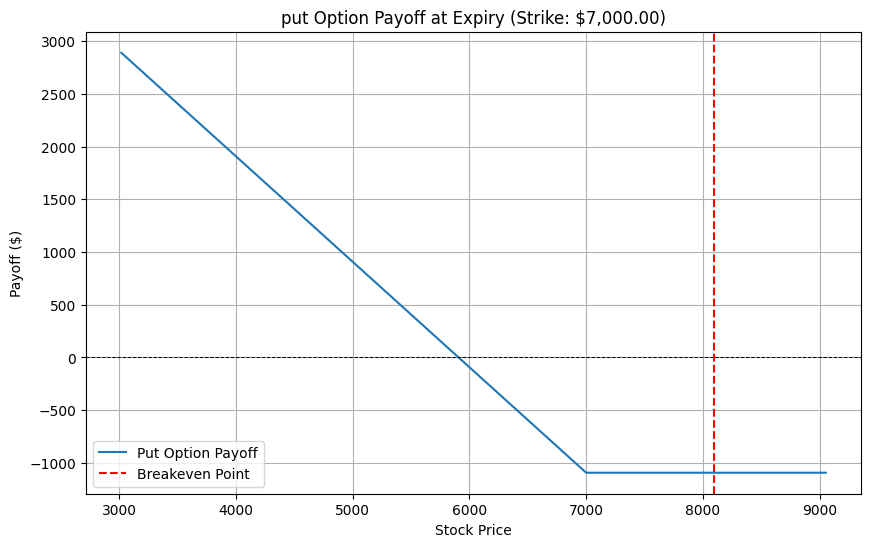

In [ ]:
# Put Option Plot
X_put = puts['strike'].iloc[-1]  # Using last strike price
premium_put = puts['lastPrice'].iloc[-1]

#YOUR CODE HERE FOR THE PLOT OF THE PUT OPTION
# Create stock price range based on current price
price_range = 0.5  # 50% above and below current price
StockPrice = np.linspace(current_price * (1 - price_range),
                        current_price * (1 + price_range),
                        1000)

# Calculate payoff (vectorized)
Payoff_put = payoff('P', premium_put, StockPrice, X_put)

# Plot the call option payoff
plt.figure(figsize=(10, 6))
plt.plot(StockPrice, Payoff_put, label='Put Option Payoff')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.7)
plt.axvline(x=X_put + premium_put, color='red', linestyle='--', label='Breakeven Point')
plt.xlabel('Stock Price')
plt.ylabel('Payoff ($)')
plt.title(f'put Option Payoff at Expiry (Strike: ${X_put:,.2f})')
plt.legend()
plt.grid(True)
plt.show()

**Checking for ITM,OTM,ATM**

In [ ]:
# Option Classification function
def classify_option(S, X):
    """
    Classify option as ITM, ATM, or OTM based on current stock price(S) and strike price(X)
    """
    if S>X_call and S<X_put:
        return "In the Money (ITM)"
    elif S == X:
        return "At the Money (ATM)"
    else:
        return "Out of the Money (OTM)"


In [ ]:
# Example classification
classification_call = classify_option(current_price, X_call)
classification_put = classify_option(current_price, X_put)
print(f"\nCall Option Classification: {classification_call}")
print(f"Put Option Classification: {classification_put}")


Call Option Classification: In the Money (ITM)
Put Option Classification: In the Money (ITM)


**Put Call Parity Validation**

In [ ]:
# Put-Call Parity Validation
import math
def validate_put_call_parity(S, X, premium_call, premium_put, r=0.05, T=1):
    """
    Validate Put-Call Parity relationship

    Parameters:
    S: Current stock price
    X: Strike price
    premium_call: Call option premium
    premium_put: Put option premium
    r: Risk-free interest rate (default 5%)
    T: Time to maturity in years (default 1 year)
    """
    left_hand_side = S+premium_put
    right_hand_side = premium_call + X*math.e**-r*T
    return np.isclose(left_hand_side, right_hand_side, rtol=1e-2)


**Check put-call parity**

In [ ]:
# Check put-call parity
is_parity_valid = validate_put_call_parity(current_price, X_call, premium_call, premium_put)
print(f"\nDoes Put-Call Parity Hold? {is_parity_valid}")


Does Put-Call Parity Hold? False
